<a href="https://colab.research.google.com/github/shinobu9/Seminars-in-econometrics/blob/main/sem_7_29_03_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #Шаг 1.
#!pip install pmdarima
#Шаг 2. Для тех, кто в Colab
#Runtime - Restart runtime

In [ ]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
#import pmdarima as pm
from statsmodels.tsa.stattools import adfuller

import matplotlib.dates as mdates
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# для генерации фиксированного белого шума
# мы зафиксировали такой белый шум, среднее которого очень близко к нулю и автокорреляции отсутствуют!
np.random.seed(12345)
wn = np.random.standard_normal(201)

nsimulations = 200
empty_dataset = np.zeros(nsimulations)
np.random.seed(12345)

measurement_shocks = np.zeros(nsimulations)

### Задача 24

Файл zadacha24.xlsx содержит реализации 7 моделей TS и DS рядов.
Примените к этим рядам расширенный критерий Dickey – Fuller (ADF), выбирая тот или иной вариант критерия, исходя из поведения конкретной реализации. На основании результатов проведения таких тестов подберите модели, которые могли лежать в основе получения этих реализаций.

In [ ]:
data = pd.read_excel('zadacha24.xls')
data.head()

,t,eps,z,x,y,y20,z20,z20_02t,y20_02t
0,1,-0.990964,0.000000,-0.910964,0.00000,20.00000,20.00000,20.20000,20.00000
1,2,-0.027304,0.000000,0.132696,0.00000,20.00000,20.00000,20.40000,20.00000
2,3,0.311930,0.000000,0.551930,0.31193,20.31193,20.00000,20.60000,20.41193
3,4,1.605106,1.605106,1.925106,2.07300,22.07300,21.60511,22.40511,22.32300
4,5,-0.828269,-0.025716,-0.428269,2.12527,22.12527,19.97428,20.97428,22.55027


Алгоритм: 
1. Нарисовать график
2. Определить параметры для запуска расширенного теста Дики-Фуллера (наличие константы \ тренда)
3. Провести ADF тест и проверить гипотезу единичного корня
4. Оценить модель порождения данных
5. Провести диагностику остатков
6. Выписать модель в уровнях :)

### 24.1 Ряд x:

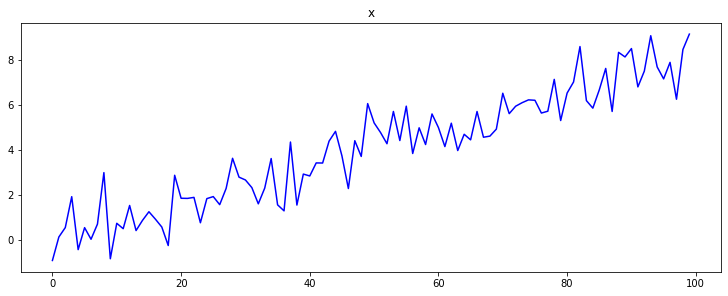

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 4), constrained_layout=True)

ax.set(title='x')
ax.plot(data['x'],'b-')

plt.show()

In [ ]:
# тест Дики-Фуллера 
# немного отличается от стандартного вывода adfuller()
def adf_test(timeseries, regression):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, maxlag=None, regression = regression, autolag='AIC', store=False, regresults=False)
    results = adfuller(timeseries, maxlag=None, regression = regression, autolag='AIC', store=True, regresults=True)[3].resols
    
    results.model.exog_names[0] = 'y(-1)'
    for item in range(dftest[2]):
        results.model.exog_names[item+1] = 'dy(' + str(-item-1) + ')'
    
    trend_len = len(regression) - 1
    if trend_len > 0:
        for item in range(trend_len):
            results.model.exog_names[dftest[2]+2] = 'trend' + str(trend_len)
        
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    return results

In [ ]:
# гипотеза о существовании единичного корня
adf_test(data['x'], 'ct').aic

Results of Dickey-Fuller Test:
Test Statistic                -1.069340e+01
p-value                        8.743201e-17
#Lags Used                     0.000000e+00
Number of Observations Used    9.900000e+01
Critical Value (1%)           -4.053254e+00
Critical Value (5%)           -3.455806e+00
Critical Value (10%)          -3.153591e+00
dtype: float64


259.3419979152086

гипотеза о единичном корне отвергаем

In [ ]:
# можем оценить TS ряд сразу в уровнях!
mod_x = sm.tsa.statespace.SARIMAX(data['x'], trend='ct', order=(0,0,0))
res_x = mod_x.fit(disp = False)
print(res_x.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  100
Model:                        SARIMAX   Log Likelihood                -128.429
Date:                Wed, 29 Mar 2023   AIC                            262.858
Time:                        11:44:00   BIC                            270.674
Sample:                             0   HQIC                           266.021
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0705      0.172     -0.410      0.682      -0.408       0.267
drift          0.0830      0.003     27.883      0.000       0.077       0.089
sigma2         0.7639      0.117      6.537      0.0

In [ ]:
# можем оценить TS ряд сразу в уровнях!
mod_x = sm.tsa.statespace.SARIMAX(data['x'], trend='t', order=(0,0,0))
res_x = mod_x.fit(disp = False)
print(res_x.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  100
Model:                        SARIMAX   Log Likelihood                -128.514
Date:                Wed, 29 Mar 2023   AIC                            261.028
Time:                        11:44:35   BIC                            266.238
Sample:                             0   HQIC                           263.136
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0820      0.002     52.909      0.000       0.079       0.085
sigma2         0.7652      0.115      6.649      0.000       0.540       0.991
Ljung-Box (L1) (Q):                   0.79   Jarque-

модель без константы лучше, так как aic меньше

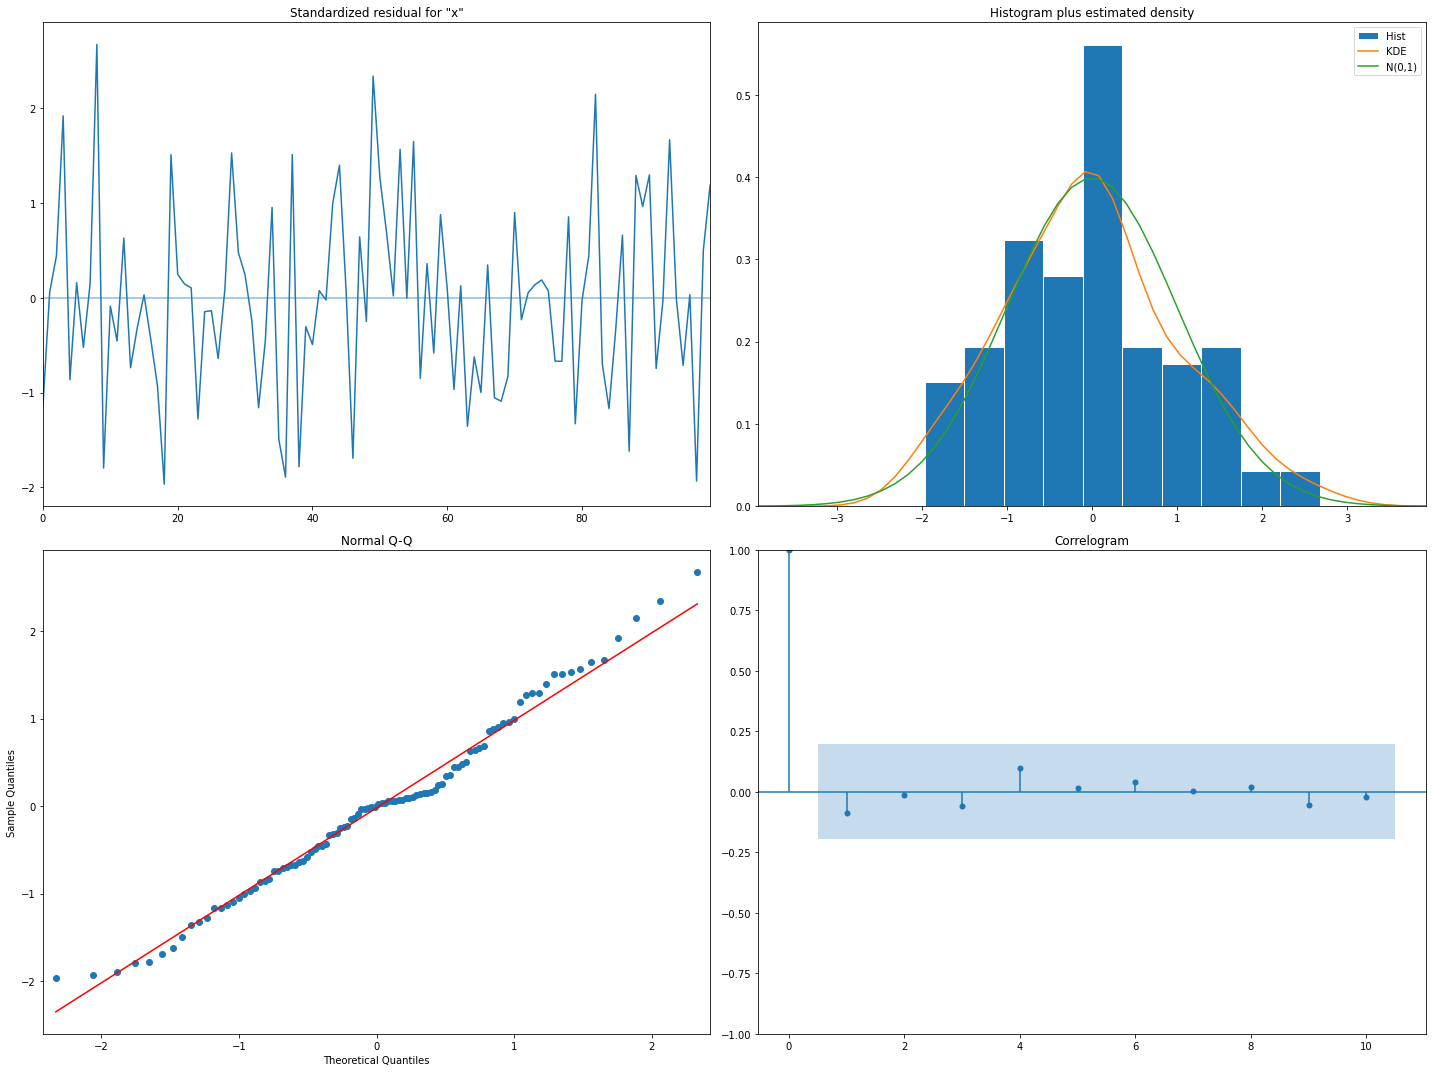

In [ ]:
res_x.plot_diagnostics(figsize=(20, 15))
plt.tight_layout()

Выпишите предполагаемую модель:

Проверьте гипотезу о равенстве коэффициента наклона 0.08. О чем говорят результаты теста?

In [ ]:
print(res_x.t_test("drift = 0.08"))

                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0820      0.002      1.266      0.206       0.079       0.085


p-value > 0.05 гипотеза о равенстве наклона 00.08 не отвергается

### 24.2 Ряд y

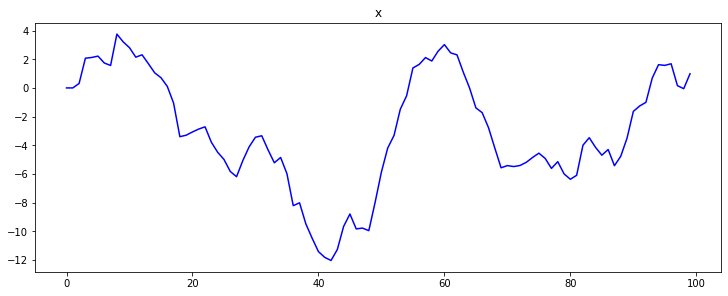

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 4), constrained_layout=True)

ax.set(title='x')
ax.plot(data['y'],'b-')

plt.show()

In [ ]:
# гипотеза о существовании единичного корня
adf_test(data['y'], 'c').bic

Results of Dickey-Fuller Test:
Test Statistic                 -1.818121
p-value                         0.371503
#Lags Used                      1.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64


263.1337339006933

In [ ]:
# гипотеза о существовании единичного корня
adf_test(data['y'], 'n').bic

Results of Dickey-Fuller Test:
Test Statistic                 -1.516115
p-value                         0.121494
#Lags Used                      1.000000
Number of Observations Used    98.000000
Critical Value (1%)            -2.588932
Critical Value (5%)            -1.944058
Critical Value (10%)           -1.614365
dtype: float64


259.5955068877443

Какая модель лучше?

Как теперь восстановить модель? Есть несколько способов:

1. Использовать модель из выкладок ADF теста:

In [ ]:
adf_test(data['y'], 'n').summary()

Results of Dickey-Fuller Test:
Test Statistic                 -1.516115
p-value                         0.121494
#Lags Used                      1.000000
Number of Observations Used    98.000000
Critical Value (1%)            -2.588932
Critical Value (5%)            -1.944058
Critical Value (10%)           -1.614365
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.208
Model:                            OLS   Adj. R-squared (uncentered):              0.191
Method:                 Least Squares   F-statistic:                              12.59
Date:                Wed, 29 Mar 2023   Prob (F-statistic):                    1.40e-05
Time:                        11:52:34   Log-Likelihood:                         -125.21
No. Observations:                  98   AIC:                                      254.4
Df Residuals:                      96   BIC:                                      259.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y(-1)         -0.0267      0.018     -1.516      0.133      -0.062       0.008
dy(-1)         0.4504      0.092      4.906      0.000       0.268       0.633
==============================================================================
Omnibus:                        1.097   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.578   Jarque-Bera (JB):                1.023
Skew:                           0.245   Prob(JB):                        0.600
Kurtosis:                       2.899   Cond. No.                         5.24
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
adf_test(data['y'], 'n')

Results of Dickey-Fuller Test:
Test Statistic                 -1.516115
p-value                         0.121494
#Lags Used                      1.000000
Number of Observations Used    98.000000
Critical Value (1%)            -2.588932
Critical Value (5%)            -1.944058
Critical Value (10%)           -1.614365
dtype: float64


Выпишите модель в разностях и в уровнях по результатам теста:

2. Оценить ARIMA, используя порядок, предложенный ADF тестом:

In [ ]:
mod_y = sm.tsa.statespace.SARIMAX(data['y'], trend = 'n', order = (1, 1, 0))
res_y = mod_y.fit(disp = False)
print(res_y.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -127.264
Date:                Wed, 29 Mar 2023   AIC                            258.528
Time:                        12:08:43   BIC                            263.718
Sample:                             0   HQIC                           260.628
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4326      0.093      4.672      0.000       0.251       0.614
sigma2         0.7641      0.115      6.672      0.000       0.540       0.989
Ljung-Box (L1) (Q):                   0.02   Jarque-

Проверьте гипотезу о равенстве коэффициента при запаздывающем лаге 0.5. О чем говорят результаты теста?

In [ ]:
print(res_y.t_test("ar.L1 = 0.5"))

                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.4326      0.093     -0.728      0.467       0.251       0.614


3. Использовать только результат ADF теста о наличии \ отсутствии единичного корня

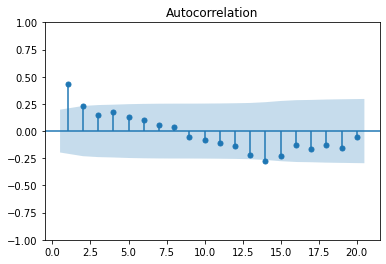

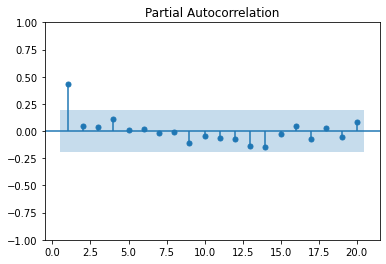

In [ ]:
# идентифицируем ряд разностей
sm.graphics.tsa.plot_acf(data['y'].diff(1).dropna(), zero = False)
sm.graphics.tsa.plot_pacf(data['y'].diff(1).dropna(), method = 'ywm', zero = False)
plt.show()

In [ ]:
# выбрать лучшую модель
res_y_ar = sm.tsa.statespace.SARIMAX(data['y'], trend='c', order=(1,1,0)).fit(disp = False)
res_y_ma = sm.tsa.statespace.SARIMAX(data['y'], trend='c', order=(0,1,2)).fit(disp = False)
res_y_arma = sm.tsa.statespace.SARIMAX(data['y'], trend='c', order=(1,1,1)).fit(disp = False)

print(res_y_ar.aic, res_y_ma.aic, res_y_arma.aic)

260.5145175921966 263.04907722787954 262.25178695675044


In [ ]:
print(res_y_ar.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -127.257
Date:                Wed, 29 Mar 2023   AIC                            260.515
Time:                        12:12:01   BIC                            268.300
Sample:                             0   HQIC                           263.664
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0100      0.090      0.112      0.911      -0.166       0.186
ar.L1          0.4326      0.093      4.668      0.000       0.251       0.614
sigma2         0.7640      0.117      6.523      0.0

Проведем диагностику остатков выбранной модели:

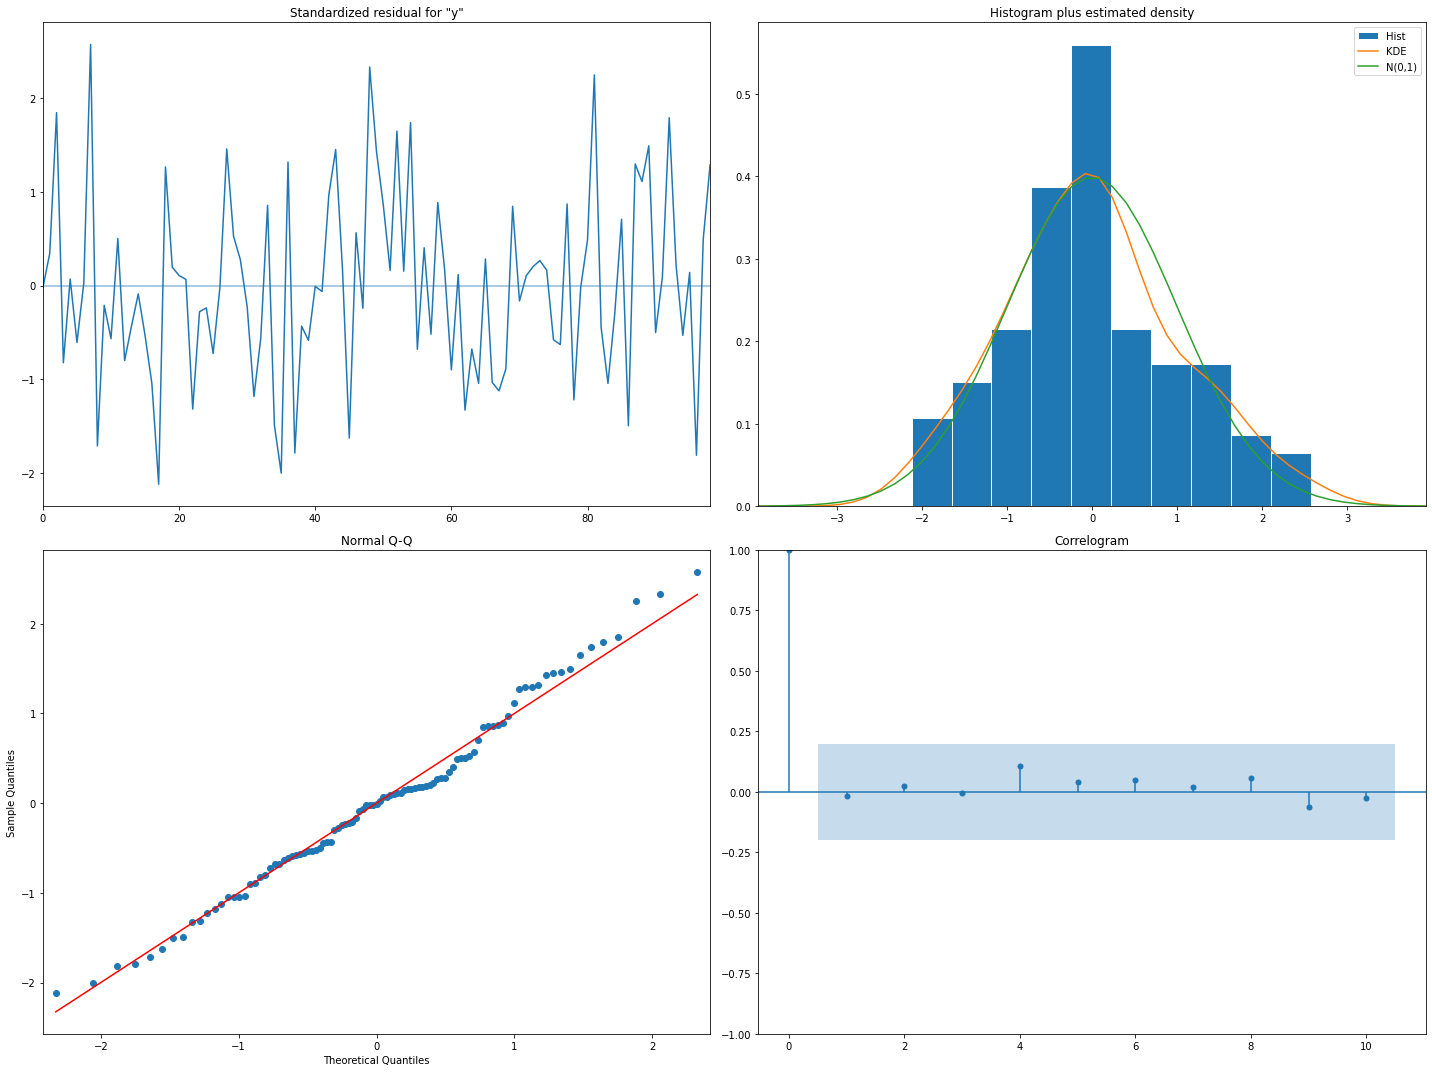

In [ ]:
res_y_ar.plot_diagnostics(figsize=(20, 15))
plt.tight_layout()

### Ряд z

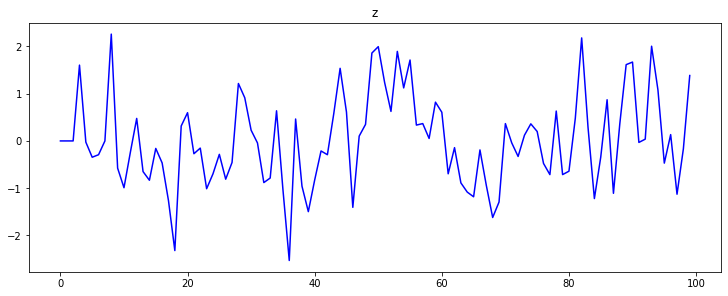

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 4), constrained_layout=True)

ax.set(title='z')
ax.plot(data['z'],'b-')

plt.show()

In [ ]:
adf_test(data['z'], 'c').summary()

Results of Dickey-Fuller Test:
Test Statistic                 -3.960968
p-value                         0.001629
#Lags Used                      2.000000
Number of Observations Used    97.000000
Critical Value (1%)            -3.499637
Critical Value (5%)            -2.891831
Critical Value (10%)           -2.582928
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     18.55
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           1.63e-09
Time:                        12:37:52   Log-Likelihood:                -125.52
No. Observations:                  97   AIC:                             259.0
Df Residuals:                      93   BIC:                             269.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y(-1)         -0.5333      0.135     -3.961      0.000      -0.801      -0.266
dy(-1)        -0.0278      0.117     -0.237      0.813      -0.261       0.205
dy(-2)        -0.2699      0.102     -2.652      0.009      -0.472      -0.068
const          0.0067      0.092      0.074      0.942      -0.175       0.188
==============================================================================
Omnibus:                        1.559   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.459   Jarque-Bera (JB):                1.583
Skew:                           0.291   Prob(JB):                        0.453
Kurtosis:                       2.772   Cond. No.                         2.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Выпишете оцениваемую модель в разностях и в уровнях:

In [ ]:
mod_z = sm.tsa.statespace.SARIMAX(data['z'],)
res_z = mod_z.fit(disp = False)
print(res_z.summary())

## Ряд y20

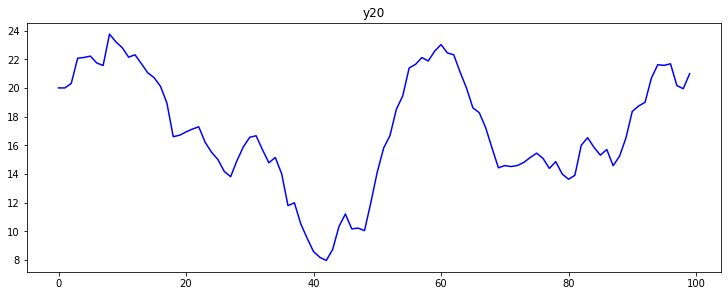

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 4), constrained_layout=True)

ax.set(title='y20')
ax.plot(data['y20'],'b-')

plt.show()

In [ ]:
adf_test(data['y20'], 'c').bic

Results of Dickey-Fuller Test:
Test Statistic                 -1.818121
p-value                         0.371503
#Lags Used                      1.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64


263.1337339006933

In [ ]:
adf_test(data['y20'], 'n').bic

Results of Dickey-Fuller Test:
Test Statistic                 -0.300602
p-value                         0.575833
#Lags Used                      1.000000
Number of Observations Used    98.000000
Critical Value (1%)            -2.588932
Critical Value (5%)            -1.944058
Critical Value (10%)           -1.614365
dtype: float64


261.8221476562667

In [ ]:
adf_test(data['y20'], 'c').summary()

Results of Dickey-Fuller Test:
Test Statistic                 -1.818121
p-value                         0.371503
#Lags Used                      1.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     13.09
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           9.52e-06
Time:                        12:33:40   Log-Likelihood:                -124.69
No. Observations:                  98   AIC:                             255.4
Df Residuals:                      95   BIC:                             263.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y(-1)         -0.0403      0.022     -1.818      0.072      -0.084       0.004
dy(-1)         0.4571      0.092      4.966      0.000       0.274       0.640
const          0.6926      0.386      1.796      0.076      -0.073       1.458
==============================================================================
Omnibus:                        1.056   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.590   Jarque-Bera (JB):                0.895
Skew:                           0.234   Prob(JB):                        0.639
Kurtosis:                       2.969   Cond. No.                         76.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
mod_y20 = sm.tsa.statespace.SARIMAX(data['y20'], trend='n', order=(1,1,0))
res_y20 = mod_y20.fit(disp = False)
print(res_y20.summary())

                               SARIMAX Results                                
Dep. Variable:                    y20   No. Observations:                  100
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -127.264
Date:                Wed, 29 Mar 2023   AIC                            258.528
Time:                        12:32:44   BIC                            263.718
Sample:                             0   HQIC                           260.628
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4326      0.093      4.672      0.000       0.251       0.614
sigma2         0.7641      0.115      6.672      0.000       0.540       0.989
Ljung-Box (L1) (Q):                   0.02   Jarque-

In [ ]:
res_y20.arroots

array([2.31149239])

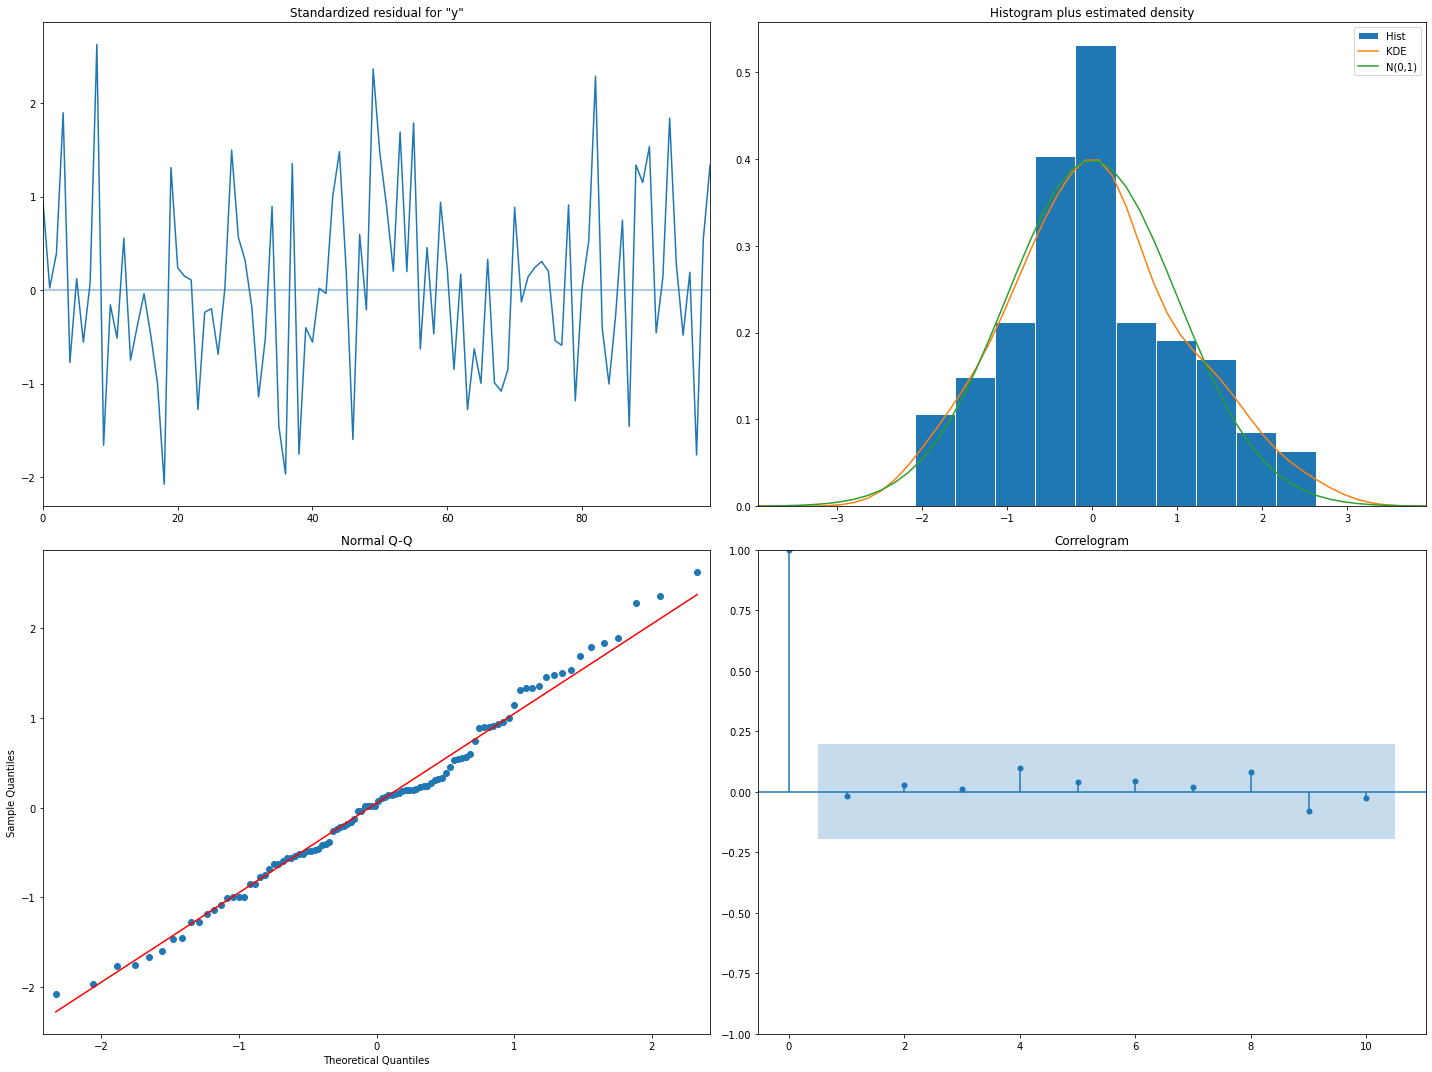

In [ ]:
res_y20.plot_diagnostics(figsize=(20, 15))
plt.tight_layout()

## Ряд z20

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 4), constrained_layout=True)

ax.set(title='z20')
ax.plot(data['z20'],'b-')

plt.show()

In [ ]:
adf_test(data['z20'], ).summary()

In [ ]:
mod_z20 = sm.tsa.statespace.SARIMAX(data['z20'], trend='c', order=(3,0,0))
res_z20 = mod_z20.fit(disp = False)
print(res_z20.summary())

In [ ]:
res_z20.plot_diagnostics(figsize=(20, 15))
plt.tight_layout()

## Ряд y20_02t

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 4), constrained_layout=True)

ax.set(title='y20')
ax.plot(data['y20_02t'],'b-')

plt.show()

In [ ]:
adf_test(data['y20_02t'], ).bic

In [ ]:
adf_test(data['y20_02t'], ).bic

In [ ]:
mod_y20 = sm.tsa.statespace.SARIMAX(data['y20_02t'], )
res_y20 = mod_y20.fit(disp = False)
print(res_y20.summary())

## Ряд z20_02t

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 4), constrained_layout=True)

ax.set(title='z20')
ax.plot(data['z20_02t'],'b-')

plt.show()

In [ ]:
adf_test(data['z20_02t'], ).summary()

In [ ]:
mod_z20 = sm.tsa.statespace.SARIMAX(data['z20_02t'],)
res_z20 = mod_z20.fit(disp = False)
print(res_z20.summary())